# Image Classification

## Approach 1 - extract all the pixels

### Importing the libraries

In [ ]:
# Importing the libraries
import cv2
import numpy as np
import os
import zipfile
from google.colab.patches import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Extracting pixels from images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import files
files.upload()

In [ ]:
# Making a kaggle directory
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d juniorbueno/neural-networks-homer-and-bart-classification

In [ ]:
# Extracting the files from the zip
zipref = zipfile.ZipFile('/content/neural-networks-homer-and-bart-classification.zip', mode = 'r')
zipref.extractall()
zipref.close()

In [ ]:
# Walking through the path to find the number of files
import os

for dirpath, dirnames, filenames in os.walk('/content/homer_bart_1'):
  print(f'There are {len(filenames)} files in {os.path.basename(dirpath)} with {len(dirnames)} directories.')

There are 269 files in homer_bart_1 with 0 directories.


In [ ]:
# Creating the variables
directory = '/content/homer_bart_1'
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]

In [ ]:
type(files), len(files)

(list, 269)

In [ ]:
import re
from PIL import Image

# Resizing the images and storing them in two variables 'images', 'classes'.
height, width = 128, 128
images = []
classes = []

# Reading the files for the resizing the image with extracting the names for the classes
for file in files:
  image = Image.open(file).convert('RGB')
  image_np = np.array(image, 'uint8')
  resized_image = cv2.resize(image_np, (height, width))
  images.append(resized_image)
  name = str(file).split('/')[3].split('.')[0]
  match = re.match(r'([a-zA-Z]+)(\d+)', name)
  if match:
    name = match.group(1)
  classes.append(name)

In [ ]:
len(images)

269

In [ ]:
len(classes)

269

In [ ]:
len(images[0])

128

In [ ]:
classes = [1 if i == 'homer' else 0 for i in classes]

In [ ]:
# Creating X and y variables
X = np.asarray(images)
y = np.asarray(classes)

In [ ]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
X.shape, y.shape

((269, 128, 128, 3), (269,))

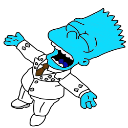

In [ ]:
# Visualizing an image
cv2_imshow(X[28])

<ipython-input-317-79795ab0c8d7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = y, palette = custom_plt)


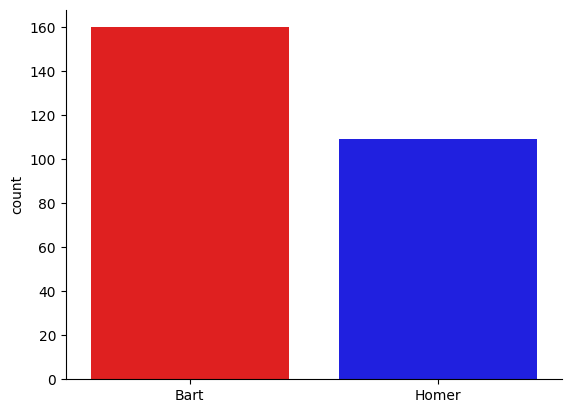

In [ ]:
# Count plot for the data
custom_plt = {'0': 'red', '1': 'blue'}
custom_label = ['Bart', 'Homer']
sns.countplot(x = y, palette = custom_plt)
plt.xticks(ticks = [0, 1], labels = custom_label)
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Using the numpy to get the count
np.unique(y, return_counts = True)

(array([0, 1]), array([160, 109]))

### Train and Test Set

In [ ]:
# Creating a train and test split for training and testing (8:2 ratio)
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = 0.8, random_state = 28)

In [ ]:
len(train_X), len(train_y)

(215, 215)

In [ ]:
len(test_X), len(test_y)

(54, 54)

In [ ]:
train_X.shape, train_y.shape

((215, 128, 128, 3), (215,))

In [ ]:
test_X.shape, test_y.shape

((54, 128, 128, 3), (54,))

### Normalizing the data

In [ ]:
# Finding the min and max value in the array
train_X[0].max(), train_X[0].min()

(255, 0)

In [ ]:
# Converting the maximum and minimum in the range of 0 & 1
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using the `ImageDataGenerator`
datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
train_X.shape

(215, 128, 128, 3)

In [ ]:
# Reshape the input data to add an additional dimension
train_X = train_X.reshape(-1 , 128, 128, 3)
test_X = test_X.reshape(-1, 128, 128, 3)

# Creating train and test data based on datagen
train_data = datagen.flow(train_X, train_y, batch_size = 32, shuffle = True)
test_data = datagen.flow(test_X, test_y, batch_size = 32, shuffle = True)

# Get the shape of the training data
train_shape = next(train_data)[0].shape

### Building and training the neural network

In [ ]:
from tensorflow.keras import Sequential as SQ
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.random import set_seed as SEED
from tensorflow.keras.losses import BinaryCrossentropy as BCE
from tensorflow.keras.optimizers import Adam

In [ ]:
# Setting the seed
SEED(28)

# Creating a neural network
model_1 = SQ()
model_1.add(Conv2D(32,
                   5,
                   strides = 3,
                   input_shape = (128, 128, 3),
                   activation = 'relu'))
model_1.add(MaxPool2D(pool_size = 3, strides = 1))
model_1.add(Conv2D(32,
                   5,
                   strides = 3,
                   activation = 'relu'))
model_1.add(MaxPool2D(pool_size = 3, strides = 1, ))
model_1.add(Flatten())
model_1.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Compiling the model
model_1.compile(loss = BCE(),
                optimizer = Adam(),
                metrics = ['accuracy'])

In [ ]:
# Fitting the model
history = model_1.fit(train_data, epochs = 30, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))

In [ ]:
model_1.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 42, 42, 32)        2432      
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 40, 40, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_48 (Conv2D)          (None, 12, 12, 32)        25632     
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 10, 10, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_22 (Flatten)        (None, 3200)              0         
                                                                 
 dense_30 (Dense)            (None, 1)               

In [ ]:
model_1.evaluate(test_data)

2/2 [==============================] - 0s 14ms/step - loss: 0.5737 - accuracy: 0.8148


[0.5737243890762329, 0.8148148059844971]

<Figure size 1000x700 with 0 Axes>

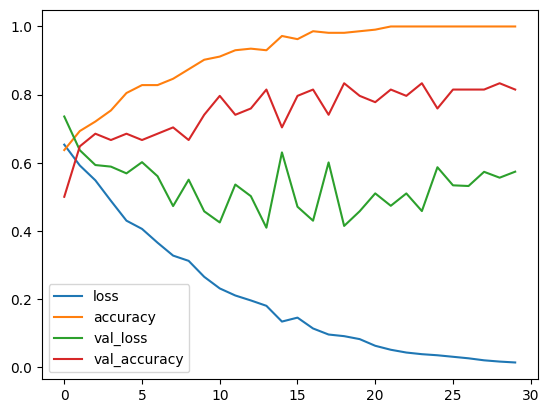

In [ ]:
plt.figure(figsize = (10, 7))
pd.DataFrame(history.history).plot()
plt.legend()
plt.show()

In [ ]:
# Finding the predictions
predictions = model_1.predict(test_X).astype(int)

2/2 [==============================] - 0s 5ms/step


In [ ]:
# Importing accuracy score
from sklearn.metrics import accuracy_score
round(accuracy_score(test_y, predictions), 2)

0.81

1/1 [==============================] - 0s 30ms/step


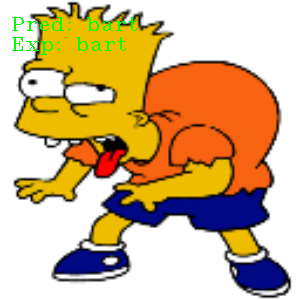

1/1 [==============================] - 0s 31ms/step


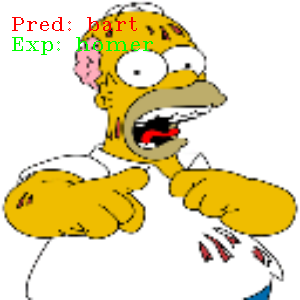

1/1 [==============================] - 0s 27ms/step


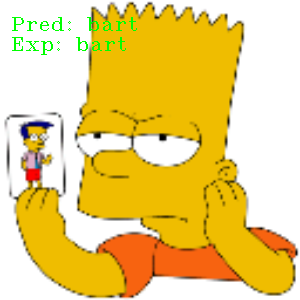

In [ ]:
# Picking a random image and predicting the class
import random

# Predicting the values
for i in range(3):
  random_index = random.randint(0, len(test_X)-1)
  img_at_index = np.array(test_X[random_index])
  processed_img = (img_at_index*(1/255.)).reshape(-1, 128, 128, 3)
  label_at_index = 'bart' if test_y[random_index] == 0 else 'homer'
  prediction = model_1.predict(processed_img).astype(int)
  prediction_label = 'bart' if prediction == 0 else 'homer'

  # Plotting the image using opencv
  resized_img = cv2.resize(img_at_index, (300, 300))
  colored_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
  cv2.putText(colored_img, 'Pred: ' + prediction_label, (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, color = (0, 255, 0) if prediction_label == label_at_index else (0, 0, 255))
  cv2.putText(colored_img, 'Exp: ' + label_at_index, (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, color = (0, 255, 0))
  cv2_imshow(colored_img)
  i+=1

In [ ]:
# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, predictions)

<Axes: >

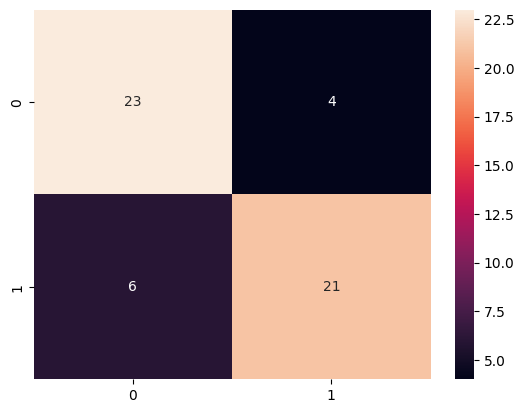

In [ ]:
# Using seaborn to plot the confusion matrix
sns.heatmap(cm, annot = True)

In [ ]:
# Plotting the classification report
from sklearn.metrics import classification_report
print(classification_report(test_y, predictions))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.84      0.78      0.81        27

    accuracy                           0.81        54
   macro avg       0.82      0.81      0.81        54
weighted avg       0.82      0.81      0.81        54



### Saving and loading the model

In [ ]:
model_json = model_1.to_json()
with open('model_1.json', 'w') as json_file:
  json_file.write(model_json)

In [ ]:
from keras.models import save_model
model_1 = save_model(model_1, 'weights.hdf5')

<ipython-input-383-98a1804ca5d1>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  model_1 = save_model(model_1, 'weights.hdf5')


In [ ]:
with open('model_1.json') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_32", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 128, 128, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_47_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d_47", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 128, 128, 3], "filters": 32, "kernel_size": [5, 5], "strides": [3, 3], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint

In [ ]:
model_loaded = tf.keras.models.model_from_json(json_saved_model)
model_loaded.load_weights('path')